# Compare guilds from 16S and TreeSAPP 

- starting with scatterplots, hastily copied/coded - not the prettiest
- code stolen from TreeSAPP analysis
- run under "R" environment

In [56]:
library(ggplot2)
suppressMessages(library(ggpmisc))
suppressMessages(library(gridExtra))
library(cowplot)
library(ggpubr)
library(grid)
library(gridExtra)
# library(corrgram)
# library(corrplot)
# suppressMessages(library(Hmisc))


# 1) import 16S data

### a) Import 16S aggregated guild count tables

In [57]:
# iTagger_gc <- read.table("../data/iTaggerOTUs/guild_data/OTU_Guild_abundT_counts.txt", sep='\t')
# iTagger_gc

In [58]:
# Silva
Silva_gc <- read.table("Silva_OTU_Guild_abundT_counts.txt", sep='\t')
# names(Silva_gc) <- paste0(names(Silva_gc),"_s")
# Silva_gc

In [59]:
Guild16S <- Silva_gc 
# Guild16S <- iTagger_gc

### b) Import TreeSAPP data

In [60]:
# TreeSAPP guild abund table, normalized by MUSICC CPM from MG-RAST (long story, works better)
TS_guilds_CPM <- read.table("../data/shotgun/TreeSAPP_v0.5_parsed_tables/TS_cleaned_guild_abund_table.txt", sep='\t')
# TS_guilds_CPM 

# Drop unneeded guilds?

In [61]:
head(TS_guilds_CPM)

,OTU,Guild,Sandmound_TuleA_D1,Sandmound_TuleA_D2,Sandmound_TuleB_D1,Sandmound_TuleB_D2,Sandmound_TuleC_D1,Sandmound_TuleC_D2,Sandmound_ThreeSqA_D1_rd,Sandmound_ThreeSqA_D2,⋯,China_Galinas_PWC_D2,Muzzi_CordA_D2,Muzzi_CordB_D2,Muzzi_CordC_D2,Muzzi_PWA_D1,Muzzi_PWA_D2,Muzzi_PWB_D1,Muzzi_PWB_D2,Muzzi_PWC_D1,Muzzi_PWC_D2
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HydA,1,HydA,777.227242,831.6287,809.84469,1013.4313,455.378464,478.9970,290.906683,230.9858,⋯,518.3087,835.01421,617.0771,754.09228,695.67480,476.8717,962.7019,454.05013,587.90475,494.5545
DsrAB.red,2,DsrAB.red,708.613317,1196.3888,659.86150,1639.9994,538.066795,871.9104,279.086689,416.1491,⋯,2239.6725,3617.94294,2408.9628,2714.74181,854.70489,2113.3422,766.3686,1717.32556,1213.29373,1903.3232
DsrAB.ox,3,DsrAB.ox,987.409809,1532.6127,740.07809,1377.9632,645.383924,865.6130,667.353474,993.6599,⋯,1369.4167,1421.50636,1592.7139,2381.74072,1598.80421,1676.9571,1565.5454,2526.37394,2723.58706,2044.6511
NxrA.other,4,NxrA.other,9.479931,428.8606,4.14647,666.9269,7.979445,512.5471,5.004855,525.4155,⋯,605.0980,618.81808,657.2921,588.78007,581.99347,956.5006,412.3770,725.94846,530.74815,1032.9234
NxrB.other,5,NxrB.other,1782.076039,1705.5446,1368.82776,1719.0226,1031.150915,1053.8742,1345.806043,1356.6468,⋯,1316.8337,1473.66360,1241.8710,1312.93650,841.73339,1881.4930,715.4902,1637.79416,1298.75980,1767.5664
NOB.nxr,6,NOB.nxr,258.693282,186.4819,288.05738,253.5605,177.748706,275.5250,213.543200,379.5519,⋯,24.6555,53.02874,65.8688,64.16367,21.61064,55.1174,NA,35.62015,23.51489,57.7415


In [62]:
TS_guild_cols <- read.table("../data/colors/TreeSAPP_Guild_color_palette2.txt", sep='\t', header=T) 
TS_guild_cols$Index <- rev(TS_guild_cols$Index)

In [63]:
# TS_Site_sort_G <- abund_loc_barplot(guild_data3, "Guild", Meta_iTag, "EWsiteHyd_index", "", TS_guild_cols)

### c) combine 16S & TreeSAPP data

In [64]:
# Get sample names from 16S guilds (to remove "OTU", "Guild" from TreeSAPP -- Guild is rowname)
samples = row.names(Guild16S)
# Guild16S$Sample <- row.names(Guild16S)

In [65]:
GuildTS <- t(TS_guilds_CPM[colnames(TS_guilds_CPM) %in% samples])
# GuildTS$Sample <- unlist(list(as.character(row.names(GuildTS))))

In [66]:
# row.names(GuildTS)

In [67]:
# GuildTS

In [68]:
# Merge 16S and TreeSAPP guilds
# Combined_guilds <- data.frame(merge(Guild16S, Guild_TS, all.y=T))
Combined_guilds <- data.frame(merge(Guild16S, GuildTS, by.x =0, by.y = 0, all.y=T))
Combined_guilds[is.na(Combined_guilds)] <-1
colnames(Combined_guilds)[1] <- 'Sample'
Combined_guilds$Sample <- as.character(Combined_guilds$Sample)

# Combined_guilds <- data.frame(merge(Guild16S, GuildTS, by="Sample", all.y=T))
# Combined_guilds[is.na(Combined_guilds)] <-1
# Combined_guilds

# 3) define plots
- the ugly way, a should be function over list

In [69]:
# Run stats - add R2 and p values to plot
# Ugly way individually
print('CH4_ac')
m1 <- lm(mcr.Ac ~ CH4_ac, data = Combined_guilds)
round(summary(m1)$r.squared, digits = 2)
summary(m1)$coefficients[2,4]
print('CH4_H2')
m2 <- lm(mcr.H2 ~ CH4_H2, data = Combined_guilds)
round(summary(m2)$r.squared, digits = 2)
summary(m2)$coefficients[2,4]
print('SRB')
m3 <- lm(DsrAB.red ~ SRB, data = Combined_guilds)
round(summary(m3)$r.squared, digits = 2)
summary(m3)$coefficients[2,4]
print('MOBI')
m4 <- lm((MOB.Ia + MOB.Ib+ MOB.Ic) ~ MOB_I, data = Combined_guilds)
round(summary(m4)$r.squared, digits = 2)
summary(m4)$coefficients[2,4]
print('MOBIIa')
m5 <- lm(MOB.IIa ~ MOB_IIa, data = Combined_guilds)
round(summary(m5)$r.squared, digits = 2)
summary(m5)$coefficients[2,4]
print('MOBII')
m6 <- lm(MOB.IIb ~ MOB_II, data = Combined_guilds)
round(summary(m6)$r.squared, digits = 2)
summary(m6)$coefficients[2,4]
print('AOA')
m7 <- lm(amoA.AOA ~ AOA, data = Combined_guilds)
round(summary(m7)$r.squared, digits = 2)
summary(m7)$coefficients[2,4]
print('AOB')
m8 <- lm(amoA.AOB ~ AOB, data = Combined_guilds)
round(summary(m8)$r.squared, digits = 2)
summary(m8)$coefficients[2,4]
print('NOB')
m9 <- lm(NOB.nxr ~ NOB, data = Combined_guilds)
round(summary(m9)$r.squared, digits = 2)
summary(m9)$coefficients[2,4]

[1] "CH4_ac"


[1] 0.29

[1] 3.246088e-11

[1] "CH4_H2"


[1] 0.89

[1] 5.036333e-65

[1] "SRB"


[1] 0.51

[1] 1.195193e-21

[1] "MOBI"


[1] 0.82

[1] 4.931575e-51

[1] "MOBIIa"


[1] 0.77

[1] 1.046107e-42

[1] "MOBII"


[1] 0

[1] 0.5637765

[1] "AOA"


[1] 0.77

[1] 9.819123e-43

[1] "AOB"


[1] 0.14

[1] 9.722175e-06

[1] "NOB"


[1] 0.56

[1] 3.025922e-25

In [70]:
# LOG VERSION
# Also showing 1:1 line - this shows that the 16S has more counts than the TreeSAPP
mcr_Ac <- ggplot(Combined_guilds, aes(x=CH4_ac, y=mcr.Ac)) + geom_point(color="#8B3626") +theme_bw() + 
            stat_smooth(method = "lm", se = F, color="#8B3626", size=0.5, linetype = 1) +
            geom_abline(slope = 1, intercept = 0, linetype = "dashed", size = 0.2, color = "grey10") +
            scale_x_continuous(trans='log10') + scale_y_continuous(trans='log10') +
            geom_text(aes(x = 0, y = Inf, hjust = -0.1, vjust = 2, label = "R^2 == 0.79"), parse = TRUE, size = 2,
                     check_overlap = TRUE) +
            geom_text(aes(x = 0, y = Inf, hjust = -0.1, vjust = 5, label = "p < 0.001"), size = 2,
                     check_overlap = TRUE) +
            theme(plot.margin = unit(c(0.1, 0.4, 0.1, 0.1), "cm"),
                  axis.text = element_text(size = 8),
                  axis.title = element_text(size = 10))

mcr_H2 <- ggplot(Combined_guilds, aes(x=CH4_H2, y=mcr.H2)) + geom_point(color="#CD4F39") +theme_bw() + 
            stat_smooth(method = "lm", se = F, color="#CD4F39", size=0.5, linetype = 1) +
            geom_abline(slope = 1, intercept = 0, linetype = "dashed", size = 0.2, color = "grey10") +
            scale_x_continuous(trans='log10') + scale_y_continuous(trans='log10') +
            geom_text(aes(x = 0, y = Inf, hjust = -0.1, vjust = 2, label = "R^2 == 0.91"), parse = TRUE, size = 2,
                     check_overlap = TRUE) +
            geom_text(aes(x = 0, y = Inf, hjust = -0.1, vjust = 5, label = "p < 0.001"), size = 2,
                     check_overlap = TRUE) +
            theme(plot.margin = unit(c(0.1, 0.4, 0.1, 0.1), "cm"),
                  axis.text = element_text(size = 8),
                  axis.title = element_text(size = 10))

SRB <- ggplot(Combined_guilds, aes(x=SRB, DsrAB.red)) + geom_point(color="#8B008B") +theme_bw() + 
            stat_smooth(method = "lm", se = F, color="#8B008B", size=0.5, linetype = 1) +
            geom_abline(slope = 1, intercept = 0, linetype = "dashed", size = 0.2, color = "grey10") +
            scale_x_continuous(trans='log10') + scale_y_continuous(trans='log10') +
            geom_text(aes(x = 0, y = Inf, hjust = -0.1, vjust = 2, label = "R^2 == 0.39"), parse = TRUE, size = 2,
                     check_overlap = TRUE) +
            geom_text(aes(x = 0, y = Inf, hjust = -0.1, vjust = 5, label = "p < 0.001"), size = 2,
                     check_overlap = TRUE) +
            theme(plot.margin = unit(c(0.1, 0.4, 0.1, 0.1), "cm"),
                  axis.text = element_text(size = 8),
                  axis.title = element_text(size = 10))

In [73]:
MOB_I <- ggplot(Combined_guilds, aes(x=MOB_I, y=(MOB.Ia + MOB.Ib+ MOB.Ic))) + geom_point(color="#63B8FF") +theme_bw()  + 
            stat_smooth(method = "lm", se = F, color="#63B8FF", size=0.5, linetype = 1) +
            geom_abline(slope = 1, intercept = 0, linetype = "dashed", size = 0.2, color = "grey10") +
            scale_x_continuous(trans='log10') + scale_y_continuous(trans='log10') +
            ylab("MOB.Ia+MOB.Ib+MOB.Ic") +
            geom_text(aes(x = 0, y = Inf, hjust = -0.1, vjust = 2, label = "R^2 == 0.82"), parse = TRUE, size = 2,
                     check_overlap = TRUE) +
            geom_text(aes(x = 0, y = Inf, hjust = -0.1, vjust = 5, label = "p < 0.001"), size = 2,
                     check_overlap = TRUE) +
            theme(plot.margin = unit(c(0.1, 0.4, 0.1, 0.1), "cm"),
                  axis.text = element_text(size = 8),
                  axis.title = element_text(size = 10))

MOB_IIa <- ggplot(Combined_guilds, aes(x=MOB_IIa, y=MOB.IIa)) + geom_point(color="#36648B") +theme_bw() + 
            stat_smooth(method = "lm", se = F, color="#36648B", size=0.5, linetype = 1) +
            geom_abline(slope = 1, intercept = 0, linetype = "dashed", size = 0.2, color = "grey10") +
            scale_x_continuous(trans='log10') + scale_y_continuous(trans='log10') +
            geom_text(aes(x = 0, y = Inf, hjust = -0.1, vjust = 2, label = "R^2 == 0.77"), parse = TRUE, size = 2,
                     check_overlap = TRUE) +
            geom_text(aes(x = 0, y = Inf, hjust = -0.1, vjust = 5, label = "p < 0.001"), size = 2,
                     check_overlap = TRUE) +
            theme(plot.margin = unit(c(0.1, 0.4, 0.1, 0.1), "cm"),
                  axis.text = element_text(size = 8),
                  axis.title = element_text(size = 10))

MOB_II <- ggplot(Combined_guilds, aes(x=MOB_II, y=MOB.IIb)) + geom_point(color="#4F94CD") +theme_bw()  + 
            geom_abline(slope = 1, intercept = 0, linetype = "dashed", size = 0.2, color = "grey10") +
            scale_x_continuous(trans='log10') + scale_y_continuous(trans='log10') +
            geom_text(aes(x = 0, y = Inf, hjust = -0.1, vjust = 2, label = "R^2 == 0.00"), parse = TRUE, size = 2,
                     check_overlap = TRUE) +
            geom_text(aes(x = 0, y = Inf, hjust = -0.1, vjust = 5, label = "p = 0.564"), size = 2,
                     check_overlap = TRUE) +
            theme(plot.margin = unit(c(0.1, 0.4, 0.1, 0.1), "cm"),
                  axis.text = element_text(size = 8),
                  axis.title = element_text(size = 10))

# MOB_III <- ggplot(Combined_guilds, aes(x=MOB_II, y=MOB.III)) + geom_point(color="#4F94CD") +theme_bw() + 
            # scale_x_continuous(trans='log10') + scale_y_continuous(trans='log10')



In [72]:
AOA <- ggplot(Combined_guilds, aes(x=AOA, y=amoA.AOA)) + geom_point(color="#7CFC00") +theme_bw() + 
            stat_smooth(method = "lm", se = F, color="#7CFC00", size=0.5, linetype = 1) +
            geom_abline(slope = 1, intercept = 0, linetype = "dashed", size = 0.2, color = "grey10") +
            scale_x_continuous(trans='log10') + scale_y_continuous(trans='log10') +
            geom_text(aes(x = 0, y = Inf, hjust = -0.1, vjust = 2, label = "R^2 == 0.77"), parse = TRUE, size = 2,
                     check_overlap = TRUE) +
            geom_text(aes(x = 0, y = Inf, hjust = -0.1, vjust = 5, label = "p < 0.001"), size = 2,
                     check_overlap = TRUE) +
            theme(plot.margin = unit(c(0.1, 0.4, 0.1, 0.1), "cm"),
                  axis.text = element_text(size = 8),
                  axis.title = element_text(size = 10))

AOB <- ggplot(Combined_guilds, aes(x=AOB, y=amoA.AOB)) + geom_point(color="#00CD00") +theme_bw() + 
            stat_smooth(method = "lm", se = F, color="#00CD00", size=0.5, linetype = 1) +
            geom_abline(slope = 1, intercept = 0, linetype = "dashed", size = 0.2, color = "grey10") +
            scale_x_continuous(trans='log10') + scale_y_continuous(trans='log10') +
            geom_text(aes(x = 0, y = Inf, hjust = -0.1, vjust = 2, label = "R^2 == 0.14"), parse = TRUE, size = 2,
                     check_overlap = TRUE) +
            geom_text(aes(x = 0, y = Inf, hjust = -0.1, vjust = 5, label = "p < 0.001"), size = 2,
                     check_overlap = TRUE) +
            theme(plot.margin = unit(c(0.1, 0.4, 0.1, 0.1), "cm"),
                  axis.text = element_text(size = 8),
                  axis.title = element_text(size = 10))

NOB <- ggplot(Combined_guilds, aes(x=NOB, y=NOB.nxr)) + geom_point(color="#008B00") +theme_bw() + 
            stat_smooth(method = "lm", se = F, color="#008B00", size=0.5, linetype = 1) +
            geom_abline(slope = 1, intercept = 0, linetype = "dashed", size = 0.2, color = "grey10") +
            scale_x_continuous(trans='log10') + scale_y_continuous(trans='log10') +
            geom_text(aes(x = 0, y = Inf, hjust = -0.1, vjust = 2, label = "R^2 == 0.56"), parse = TRUE, size = 2,
                     check_overlap = TRUE) +
            geom_text(aes(x = 0, y = Inf, hjust = -0.1, vjust = 5, label = "p < 0.001"), size = 2,
                     check_overlap = TRUE) +
            theme(plot.margin = unit(c(0.1, 0.4, 0.1, 0.1), "cm"),
                  axis.text = element_text(size = 8),
                  axis.title = element_text(size = 10))
            #scale_x_continuous(trans='log10', breaks = 5, labels = c('10','100','1000','10000')) + scale_y_continuous(trans='log10')

# 3) Plot the big grid (Figure S8)

In [74]:
pdf("../figs/FigureS8.pdf", width = 7.5, height = 7.5)
plot <- suppressWarnings(plot_grid(mcr_Ac, mcr_H2, SRB, MOB_I, MOB_IIa, MOB_II, AOA, AOB, NOB, 
          ncol = 3, nrow = 3, labels = "auto", vjust = 1, align = "hv"))
y.grob <- textGrob("TreeSAPP CPM", 
                   gp=gpar(fontface="bold", col="black", fontsize=14), rot=90)
x.grob <- textGrob("16S CPM", 
                   gp=gpar(fontface="bold", col="black", fontsize=14))
grid.arrange(arrangeGrob(plot, left = y.grob, bottom = x.grob))
dev.off()

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



pdf 
  2

# 4) Plot TreeSAPP guild abundances 

In [24]:
# source("../modules/5_OTU_barplots_module_v0.3.7.4.R")       # working under R 4.0.2. But not uploaded to the repo
source("../modules/5_OTU_barplots_module_v0.4.R")

In [20]:
# TS_guilds_CPM

,OTU,Guild,Sandmound_TuleA_D1,Sandmound_TuleA_D2,Sandmound_TuleB_D1,Sandmound_TuleB_D2,Sandmound_TuleC_D1,Sandmound_TuleC_D2,Sandmound_ThreeSqA_D1_rd,Sandmound_ThreeSqA_D2,⋯,China_Galinas_PWC_D2,Muzzi_CordA_D2,Muzzi_CordB_D2,Muzzi_CordC_D2,Muzzi_PWA_D1,Muzzi_PWA_D2,Muzzi_PWB_D1,Muzzi_PWB_D2,Muzzi_PWC_D1,Muzzi_PWC_D2
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HydA,1,HydA,777.227242,831.628654,809.844689,1013.431343,455.378464,478.996976,290.906683,230.985824,⋯,518.308738,835.014206,617.077076,754.092276,695.674805,476.871722,962.701925,454.050127,587.904745,494.554496
DsrAB.red,2,DsrAB.red,708.613317,1196.388760,659.861500,1639.999353,538.066795,871.910404,279.086689,416.149134,⋯,2239.672482,3617.942941,2408.962843,2714.741813,854.704891,2113.342161,766.368634,1717.325563,1213.293726,1903.323193
DsrAB.ox,3,DsrAB.ox,987.409809,1532.612698,740.078094,1377.963205,645.383924,865.612970,667.353474,993.659857,⋯,1369.416676,1421.506364,1592.713945,2381.740724,1598.804208,1676.957085,1565.545408,2526.373936,2723.587061,2044.651104
NxrA.other,4,NxrA.other,9.479931,428.860644,4.146470,666.926931,7.979445,512.547094,5.004855,525.415549,⋯,605.097950,618.818083,657.292115,588.780073,581.993475,956.500564,412.376998,725.948465,530.748148,1032.923417
NxrB.other,5,NxrB.other,1782.076039,1705.544640,1368.827763,1719.022613,1031.150915,1053.874242,1345.806043,1356.646758,⋯,1316.833720,1473.663598,1241.870959,1312.936497,841.733390,1881.493049,715.490230,1637.794162,1298.759797,1767.566441
NOB.nxr,6,NOB.nxr,258.693282,186.481945,288.057376,253.560517,177.748706,275.524995,213.543200,379.551912,⋯,24.655501,53.028736,65.868795,64.163672,21.610641,55.117400,NA,35.620147,23.514888,57.741504
AmoA.Ic,7,AmoA.Ic,6.105267,5.024280,2.561272,2.089637,6.879661,2.232452,2.390886,0.000000,⋯,2.306736,0.000000,2.055946,2.204367,3.956667,2.151982,0.000000,0.000000,0.000000,0.000000
amoA.AOB,8,amoA.AOB,28.783250,15.430568,43.523332,12.911889,10.175445,22.609259,43.541625,22.986008,⋯,0.000000,21.057896,19.739217,13.027845,2.306736,2.151023,0.000000,2.204367,3.956667,2.151982
amoA.AOA,9,amoA.AOA,98.696084,49.940072,89.962700,58.077630,76.070017,103.605242,154.309997,105.447096,⋯,3.676842,64.659701,70.268181,147.418466,23.919082,18.425659,5.639776,10.856537,32.294303,36.567397


In [25]:
# import TreeSAPP colors 
TS_guild_cols <- read.table("../data/colors/TreeSAPP_Guild_color_palette2.txt", sep='\t', header=T)
TS_guild_cols$Index <-rev(TS_guild_cols$Index)

### a) import metadata 

In [26]:
# Import site colors
site_colors <- read.table("../data/colors/Sal_siteColors_testR.txt", sep='\t', header=T, row.names=1)               # site_colors
colnames(site_colors) <-c('color','Location') 

In [27]:
metaDB <-read.table("../data/meta/SF_sal_meta_FIX3.5.txt", sep="\t", header=TRUE)               # import Mapping    # # try keeping all params...

### b) prune guild data  

In [28]:
# TS_guilds_CPM

TS_clean_guilds0 <- TS_guilds_CPM[!TS_guilds_CPM$Guild=="DsrAB.red",]
TS_clean_guilds <- TS_clean_guilds0[!TS_clean_guilds0$Guild=="NxrA.other",]
TS_clean_guilds <- TS_clean_guilds[!TS_clean_guilds$Guild=="NxrB.other",]
TS_clean_guilds <- TS_clean_guilds[!TS_clean_guilds$Guild=="DsrAB.ox",]
TS_clean_guilds <- TS_clean_guilds[!TS_clean_guilds$Guild=="emoA",]
TS_clean_guilds <- TS_clean_guilds[!TS_clean_guilds$Guild=="pxmA",]
TS_clean_guilds <- TS_clean_guilds[!TS_clean_guilds$Guild=="HydA",]
TS_clean_guilds[is.na(TS_clean_guilds)] <- 0

### c) plot guild abundances 

In [29]:
TS_Site_sort_G <- abund_loc_barplot(TS_guilds_CPM, "Guild", metaDB, "EWsiteHyd_index", "", TS_guild_cols)

Using Guild as id variables

Warning message:
“Removed 61 rows containing missing values (position_stack).”
Warning message:
“Removed 61 rows containing missing values (position_stack).”


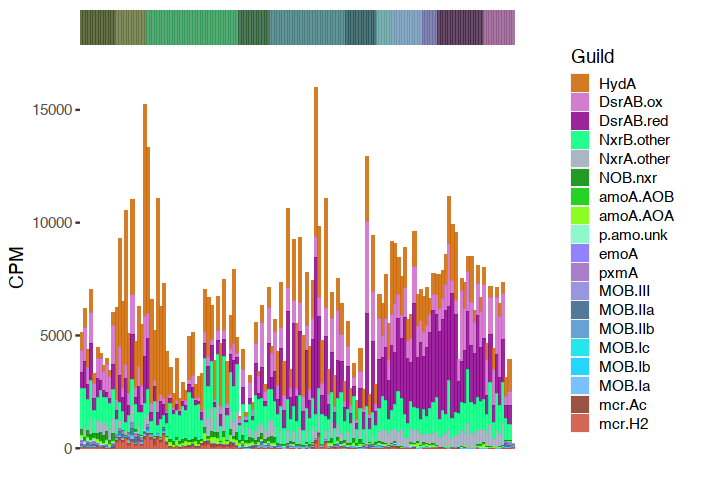

In [30]:
options(repr.plot.width=6, repr.plot.height=4) 
TS_Site_sort_G

In [31]:
TS_reduced_Gs <- abund_loc_barplot(TS_clean_guilds, "Guild", metaDB, "EWsiteHyd_index", "", TS_guild_cols)

Using Guild as id variables



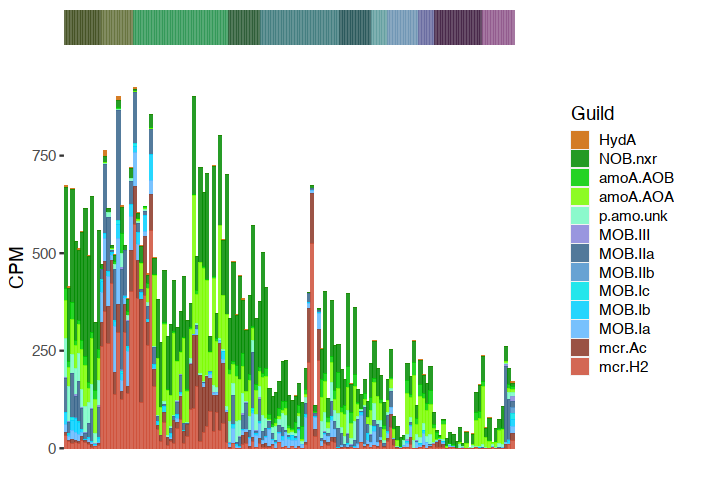

In [32]:
TS_reduced_Gs